<a href="https://colab.research.google.com/github/fgith/data-science/blob/main/logistic-regression/logistic_regression_customerpersonality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
!wget "https://raw.githubusercontent.com/fgith/data-science/main/datasets/marketing_campaign.csv"

--2022-04-23 08:38:46--  https://raw.githubusercontent.com/fgith/data-science/main/datasets/marketing_campaign.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 217947 (213K) [text/plain]
Saving to: ‘marketing_campaign.csv.2’

marketing_campaign. 100%[===================>] 212.84K  --.-KB/s    in 0.03s   

2022-04-23 08:38:47 (6.89 MB/s) - ‘marketing_campaign.csv.2’ saved [217947/217947]



In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  

**Load CSV Dataset**

In [68]:
dataset = pd.read_csv("marketing_campaign.csv",delimiter='\t')

In [69]:
df = pd.DataFrame(dataset)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [70]:
# df.isnull().sum()
# df.info()
df.columns
# df.index
# df.values
# df.shape
# df.head()

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [71]:
# Function to convert Year_Birth column to Age
from datetime import date
def age(birthyear):
  today = date.today()
  age = today.year - birthyear
  return age

In [72]:
# Add new column 'Age' to dataset
df['Age'] = age(df['Year_Birth'])

# Add new column Kids = Kidhome + Teenhome
df['Kids'] = df['Kidhome'] + df['Teenhome']

# Add new column AmountSpent = Add ('MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds')
df['AmountSpent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# Add new column NoOfPurchases = Add ('NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases')
df['NoOfPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Kids,AmountSpent,NoOfPurchases
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,3,11,1,65,0,1617,22
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,3,11,0,68,2,27,4
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,3,11,0,57,0,776,20
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,3,11,0,38,1,53,6
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,3,11,0,41,1,422,14


In [73]:
# Drop unwanted columns
df.drop(['Year_Birth','ID','Z_CostContact','Z_Revenue','Kidhome','Teenhome','MntWines', 
         'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
         'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'],
        axis=1,inplace=True)
df.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,NumDealsPurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Kids,AmountSpent,NoOfPurchases
0,Graduation,Single,58138.0,04-09-2012,58,3,7,0,0,0,0,0,0,1,65,0,1617,22
1,Graduation,Single,46344.0,08-03-2014,38,2,5,0,0,0,0,0,0,0,68,2,27,4
2,Graduation,Together,71613.0,21-08-2013,26,1,4,0,0,0,0,0,0,0,57,0,776,20
3,Graduation,Together,26646.0,10-02-2014,26,2,6,0,0,0,0,0,0,0,38,1,53,6
4,PhD,Married,58293.0,19-01-2014,94,5,5,0,0,0,0,0,0,0,41,1,422,14


In [74]:
df['Marital_Status'].unique()
df['Education'].unique()

df['Marital_Status'] = df['Marital_Status'].replace({'Married':'Couple','Together':'Couple','Divorced':'Couple',
                                                    'Alone':'Single','Widow':'Single','Alone':'Single',
                                                    'Absurd':'Single','YOLO':'Single'})

df['Education'] = df['Education'].replace({'Basic':'Basic','2n Cycle':'Basic', 
                                           'Master':'Graduation','PhD':'Doctorate'})

df.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,NumDealsPurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Kids,AmountSpent,NoOfPurchases
0,Graduation,Single,58138.0,04-09-2012,58,3,7,0,0,0,0,0,0,1,65,0,1617,22
1,Graduation,Single,46344.0,08-03-2014,38,2,5,0,0,0,0,0,0,0,68,2,27,4
2,Graduation,Couple,71613.0,21-08-2013,26,1,4,0,0,0,0,0,0,0,57,0,776,20
3,Graduation,Couple,26646.0,10-02-2014,26,2,6,0,0,0,0,0,0,0,38,1,53,6
4,Doctorate,Couple,58293.0,19-01-2014,94,5,5,0,0,0,0,0,0,0,41,1,422,14


In [75]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

label_encoder = LabelEncoder()
df['Education'] = df[['Education']].apply(label_encoder.fit_transform)

one_hot_encoder = OneHotEncoder()
df1 = one_hot_encoder.fit_transform(df[['Marital_Status']]).toarray()

encodings = pd.DataFrame(columns = one_hot_encoder.get_feature_names_out(), data = df1)

df = pd.concat([df,encodings] , axis=1)
df.head()

,Education,Marital_Status,Income,Dt_Customer,Recency,NumDealsPurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Kids,AmountSpent,NoOfPurchases,Marital_Status_Couple,Marital_Status_Single
0,2,Single,58138.0,04-09-2012,58,3,7,0,0,0,0,0,0,1,65,0,1617,22,0.0,1.0
1,2,Single,46344.0,08-03-2014,38,2,5,0,0,0,0,0,0,0,68,2,27,4,0.0,1.0
2,2,Couple,71613.0,21-08-2013,26,1,4,0,0,0,0,0,0,0,57,0,776,20,1.0,0.0
3,2,Couple,26646.0,10-02-2014,26,2,6,0,0,0,0,0,0,0,38,1,53,6,1.0,0.0
4,1,Couple,58293.0,19-01-2014,94,5,5,0,0,0,0,0,0,0,41,1,422,14,1.0,0.0


In [76]:
df = df.drop(['Marital_Status'],axis=1)

df.head()

,Education,Income,Dt_Customer,Recency,NumDealsPurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Kids,AmountSpent,NoOfPurchases,Marital_Status_Couple,Marital_Status_Single
0,2,58138.0,04-09-2012,58,3,7,0,0,0,0,0,0,1,65,0,1617,22,0.0,1.0
1,2,46344.0,08-03-2014,38,2,5,0,0,0,0,0,0,0,68,2,27,4,0.0,1.0
2,2,71613.0,21-08-2013,26,1,4,0,0,0,0,0,0,0,57,0,776,20,1.0,0.0
3,2,26646.0,10-02-2014,26,2,6,0,0,0,0,0,0,0,38,1,53,6,1.0,0.0
4,1,58293.0,19-01-2014,94,5,5,0,0,0,0,0,0,0,41,1,422,14,1.0,0.0


In [77]:
from datetime import date

today = date.today()
x = pd.to_datetime(today) - pd.to_datetime(df['Dt_Customer'])
df['Customer_Since'] = x.dt.days

df['AcceptedCmp_total'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

In [78]:
# Drop Dt_Customer
df.drop(['Dt_Customer','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5'], axis=1,inplace=True)
df.head()

,Education,Income,Recency,NumDealsPurchases,NumWebVisitsMonth,Complain,Response,Age,Kids,AmountSpent,NoOfPurchases,Marital_Status_Couple,Marital_Status_Single,Customer_Since,AcceptedCmp_total
0,2,58138.0,58,3,7,0,1,65,0,1617,22,0.0,1.0,3666,0
1,2,46344.0,38,2,5,0,0,68,2,27,4,0.0,1.0,2820,0
2,2,71613.0,26,1,4,0,0,57,0,776,20,1.0,0.0,3167,0
3,2,26646.0,26,2,6,0,0,38,1,53,6,1.0,0.0,2760,0
4,1,58293.0,94,5,5,0,0,41,1,422,14,1.0,0.0,3016,0


In [79]:
# Calculate duplicates
dups = df.duplicated()

# Print if there are any duplicates
print(dups.any()," No of duplicates: ",len(df[dups]), df.shape)

# Drop duplicate rows
df.drop_duplicates(inplace = True)

df.shape

True  No of duplicates:  184 (2240, 15)


(2056, 15)

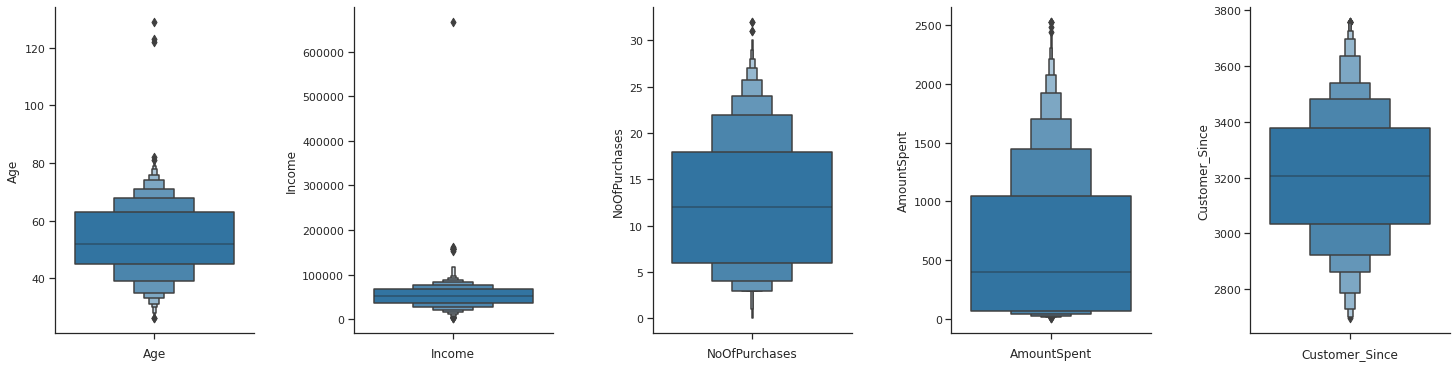

In [80]:
import seaborn as sns
sns.set_theme(style="ticks", palette="tab10")

cols = ['Age','Income','NoOfPurchases','AmountSpent','Customer_Since']

fig, ax = plt.subplots(ncols=len(cols), figsize=(5 * len(cols),6), sharex = True)

for i in range(len(cols)):
  (sns.boxenplot(y=df[cols[i]],data=df, showfliers=True,ax=ax[i])).set(xlabel=cols[i])

fig.subplots_adjust(wspace=0.5)
sns.despine()


In [81]:
#Remove outliers

print("Number of customers above the age of 100= ", len(df[df["Age"]>100]))
print("Number of customers with income above 200,000= ", len(df[df["Income"]>200000]))

print(df[df['Age']>100])
print(df[df['Income']>200_000])

df = df[df['Age']<100]
df = df[df['Income']<200_000]

print("Number of customers above the age of 100= ", len(df[df["Age"]>100]))
print("Number of customers with income above 200,000= ", len(df[df["Income"]>200000]))

Number of customers above the age of 100=  3
Number of customers with income above 200,000=  1
     Education   Income  Recency  NumDealsPurchases  NumWebVisitsMonth  \
192          0  36640.0       99                  1                  5   
239          0  60182.0       23                  1                  4   
339          1  83532.0       36                  1                  1   

     Complain  Response  Age  Kids  AmountSpent  NoOfPurchases  \
192         1         0  122     1           65              5   
239         0         0  129     1           22              3   
339         0         0  123     0         1853             14   

     Marital_Status_Couple  Marital_Status_Single  Customer_Since  \
192                    1.0                    0.0            3131   
239                    0.0                    1.0            2898   
339                    1.0                    0.0            3131   

     AcceptedCmp_total  
192                  0  
239             

In [85]:
from sklearn.impute import SimpleImputer

# impute = SimpleImputer(strategy='mean')
# df['Income'] = impute.fit_transform(df['Income'].to_numpy().reshape(-1,1))
# df['Income'] = df['Income'].fillna(0)

df.head()

df_orig = df.copy(deep=True)

df_orig.head()

,Education,Income,Recency,NumDealsPurchases,NumWebVisitsMonth,Complain,Response,Age,Kids,AmountSpent,NoOfPurchases,Marital_Status_Couple,Marital_Status_Single,Customer_Since,AcceptedCmp_total
0,2,58138.0,58,3,7,0,1,65,0,1617,22,0.0,1.0,3666,0
1,2,46344.0,38,2,5,0,0,68,2,27,4,0.0,1.0,2820,0
2,2,71613.0,26,1,4,0,0,57,0,776,20,1.0,0.0,3167,0
3,2,26646.0,26,2,6,0,0,38,1,53,6,1.0,0.0,2760,0
4,1,58293.0,94,5,5,0,0,41,1,422,14,1.0,0.0,3016,0


In [57]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df.head()

,Education,Income,Recency,NumDealsPurchases,NumWebVisitsMonth,Complain,Response,Age,Kids,AmountSpent,NoOfPurchases,Marital_Status_Couple,Marital_Status_Single,Customer_Since,AcceptedCmp_total
0,0.648231,0.281745,0.314531,0.342935,0.687446,-0.097249,2.349660,1.019957,-1.275339,1.672541,1.312628,-1.718492,1.718492,1.976202,-0.443258
1,0.648231,-0.264452,-0.376177,-0.174144,-0.132637,-0.097249,-0.425594,1.277241,1.404855,-0.963588,-1.191484,-1.718492,1.718492,-1.661321,-0.443258
2,0.648231,0.905790,-0.790603,-0.691223,-0.542678,-0.097249,-0.425594,0.333868,-1.275339,0.278211,1.034394,0.581905,-0.581905,-0.169335,-0.443258
3,0.648231,-1.176694,-0.790603,-0.174144,0.277405,-0.097249,-0.425594,-1.295594,0.064758,-0.920481,-0.913249,0.581905,-0.581905,-1.919302,-0.443258
4,-0.801177,0.288923,1.557807,1.377092,-0.132637,-0.097249,-0.425594,-1.038310,0.064758,-0.308700,0.199690,0.581905,-0.581905,-0.818585,-0.443258


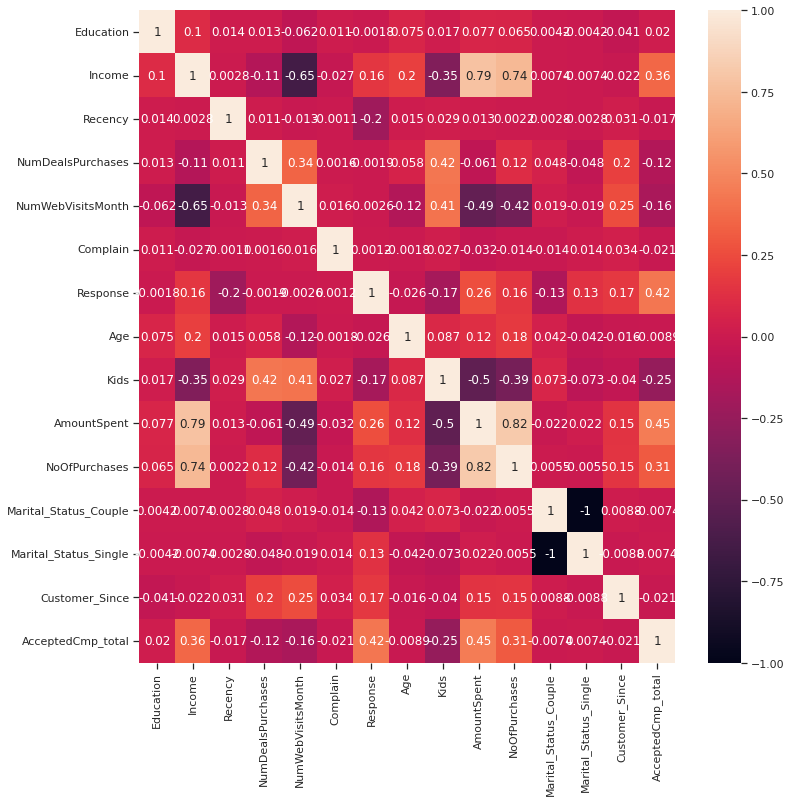

In [58]:
fig = plt.figure(figsize=(12,12))         
sns.heatmap(df.corr(), annot = True)

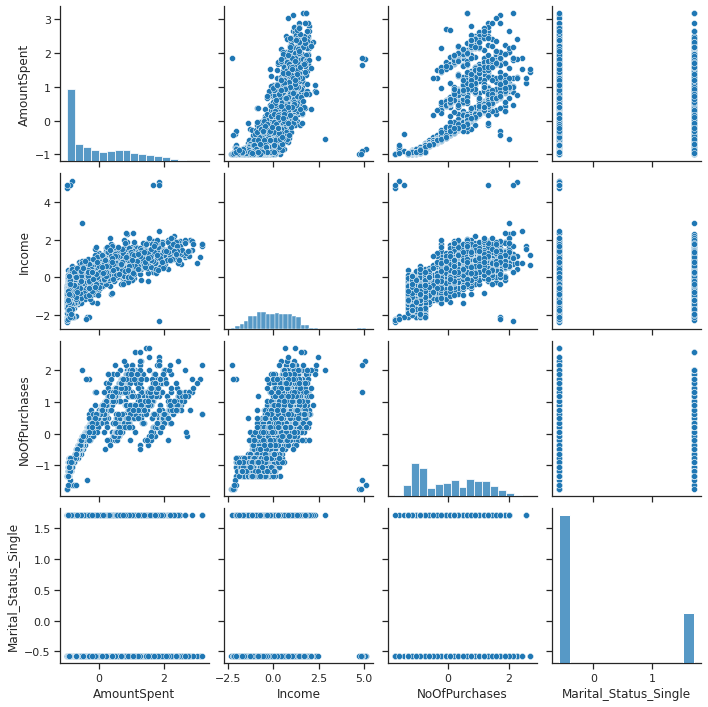

In [59]:
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

# There are some correlataions such as Income vs Amount Spent and No of Purchases. They can viewed again in a pairplot. 
# Hence, there is scope for Dimentionaly Reduction.

sns.pairplot(df[['AmountSpent','Income','NoOfPurchases','Marital_Status_Single']])

In [60]:
# Function to select highly correlated features

def correlation(dataset, threshold):
    col_corr = set()  # Set of names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # absolute coeff value to account for -ve correlation
                colname = corr_matrix.columns[i]  # get name of column
                col_corr.add(colname)
    return col_corr
corr_features = correlation(df, 0.75)
print(len(set(corr_features)), " ", corr_features)

3   {'NoOfPurchases', 'Marital_Status_Single', 'AmountSpent'}


In [61]:
# Drop correlated features from dataset
df = df.drop(corr_features,axis=1)
df.head()

,Education,Income,Recency,NumDealsPurchases,NumWebVisitsMonth,Complain,Response,Age,Kids,Marital_Status_Couple,Customer_Since,AcceptedCmp_total
0,0.648231,0.281745,0.314531,0.342935,0.687446,-0.097249,2.349660,1.019957,-1.275339,-1.718492,1.976202,-0.443258
1,0.648231,-0.264452,-0.376177,-0.174144,-0.132637,-0.097249,-0.425594,1.277241,1.404855,-1.718492,-1.661321,-0.443258
2,0.648231,0.905790,-0.790603,-0.691223,-0.542678,-0.097249,-0.425594,0.333868,-1.275339,0.581905,-0.169335,-0.443258
3,0.648231,-1.176694,-0.790603,-0.174144,0.277405,-0.097249,-0.425594,-1.295594,0.064758,0.581905,-1.919302,-0.443258
4,-0.801177,0.288923,1.557807,1.377092,-0.132637,-0.097249,-0.425594,-1.038310,0.064758,0.581905,-0.818585,-0.443258


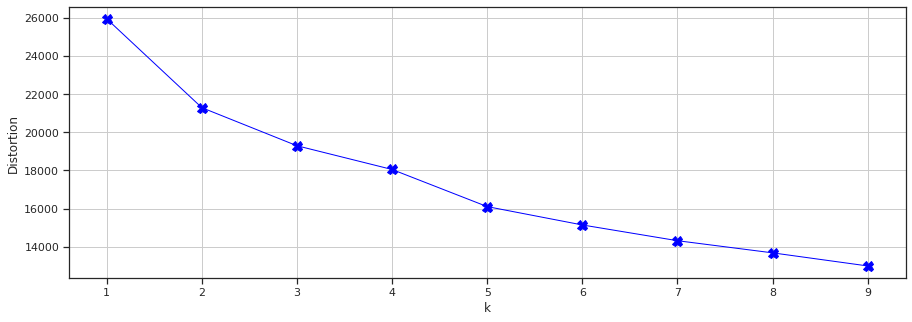

In [65]:
distortions = []
K = range(1,10)
for k in K:
    km = cluster.KMeans(n_clusters=k)
    km.fit(df)
    distortions.append(km.inertia_)

plt.figure(figsize=(15,5))
plt.rcParams.update({'axes.grid': True})
plt.plot(K, distortions, 'bX-',linewidth=1, markersize=10)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.show()

In [62]:
import sklearn.cluster as cluster

kmeans = cluster.KMeans(n_clusters=4, init="k-means++")
kmeans.fit(df)

KMeans(n_clusters=4)

In [87]:
kmeans.cluster_centers_

kmeans.labels_

df['Cluster'] = kmeans.labels_
df_orig['Cluster'] = kmeans.labels_
df_orig.head()

,Education,Income,Recency,NumDealsPurchases,NumWebVisitsMonth,Complain,Response,Age,Kids,AmountSpent,NoOfPurchases,Marital_Status_Couple,Marital_Status_Single,Customer_Since,AcceptedCmp_total,Cluster
0,2,58138.0,58,3,7,0,1,65,0,1617,22,0.0,1.0,3666,0,1
1,2,46344.0,38,2,5,0,0,68,2,27,4,0.0,1.0,2820,0,2
2,2,71613.0,26,1,4,0,0,57,0,776,20,1.0,0.0,3167,0,0
3,2,26646.0,26,2,6,0,0,38,1,53,6,1.0,0.0,2760,0,2
4,1,58293.0,94,5,5,0,0,41,1,422,14,1.0,0.0,3016,0,2


ValueError: ignored

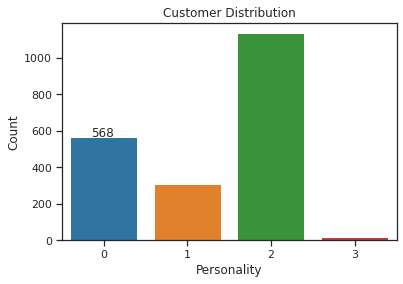

In [129]:
# plt.rcParams.update()
# plt.hist(df_orig['Cluster'],align='mid',bins=df_orig['Cluster'].unique().sort())

count_plot = sns.countplot(x = df_orig['Cluster'])
count_plot.set(xlabel ="Personality", ylabel = "Count", title ='Customer Distribution')

total = len(df_orig)


for p in count_plot.patches:
   count_plot.annotate('{}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
   percentage = '({:.1f}%)'.format(100 * p.get_height()/total)
   x = p.get_x() + p.get_width()
   y = p.get_height()
   count_plot.annotate(percentage, (x, y),ha = 'center')

sns.despine()